In [8]:
import pandas as pd
import os
import numpy as np

# This line is needed to display plots inline in Jupyter Notebook
%matplotlib inline

# Required for basic python plotting functionality
import matplotlib.pyplot as plt

# Required for formatting dates later in the case
import datetime
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

# Required to display image inline
from IPython.display import Image

# Advanced plotting functionality with seaborn
import seaborn as sns
sns.set(style="whitegrid") # can set style depending on how you'd like it to look

#import folium  #needed for interactive map
#from folium.plugins import HeatMap

import branca


plotsize = (15,6)


In [9]:
data_g36 = pd.read_excel(io = "./MTFF Graphs English.xlsx", sheet_name = "G 3.6.", skiprows = 28, usecols = "B:S", header = 0, nrows = 6)

data_g36.rename({"Concepto": 'KPI',
                2023 : '2023',
                2024 : '2024',
                2025 : '2025',
                2026 : '2026',
                2027 : '2027',
                2028 : '2028',
                2029 : '2029',
                2030 : '2030',
                2031 : '2031',
                2032 : '2032',
                2033 : '2033',
                2034 : '2034',
                2035 : '2035'}, axis = 1, inplace = True)

print(data_g36)

                    KPI  2019  2020  2021  2022  2023  2024  2025  2026  2027  \
0  Non-oil tax revenues  13.5  12.8  13.2  13.9  15.7  15.1  16.1  16.2  16.4   
1        Oil revenues**   1.5   0.9   0.4   1.7   2.4   1.0   0.6   0.5   0.7   
2    Asset optimization   0.0   0.0   1.1   0.0   0.0   0.0   0.0   0.0   0.0   
3                  Rest   1.1   1.5   1.3   0.7   0.7   1.1   0.9   1.2   1.2   
4                 Total  16.2  15.3  16.1  16.2  18.8  17.1  17.5  17.9  18.2   

   2028  2029  2030  2031  2032  2033  2034  2035  
0  16.5  16.6  16.7  16.8  17.0  17.1  17.2  17.4  
1   0.8   1.0   1.1   1.0   1.1   1.2   1.2   1.2  
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3   1.2   1.2   1.2   1.2   1.2   1.2   1.2   1.2  
4  18.4  18.8  19.0  19.0  19.3  19.5  19.7  19.7  


In [10]:
data_g36_graph = pd.melt(data_g36, id_vars = ["KPI"], value_vars = ['2023', '2024', '2025', '2026', '2027', '2028', '2029', '2030', '2031', '2032', '2033', '2034', '2035'], var_name = "Year")
data_g36_graph.rename({'value': '% GDP'}, inplace = True, axis = 1)
data_g36_graph

,KPI,Year,% GDP
0,Non-oil tax revenues,2023,15.7
1,Oil revenues**,2023,2.4
2,Asset optimization,2023,0.0
3,Rest,2023,0.7
4,Total,2023,18.8
...,...,...,...
60,Non-oil tax revenues,2035,17.4
61,Oil revenues**,2035,1.2
62,Asset optimization,2035,0.0
63,Rest,2035,1.2


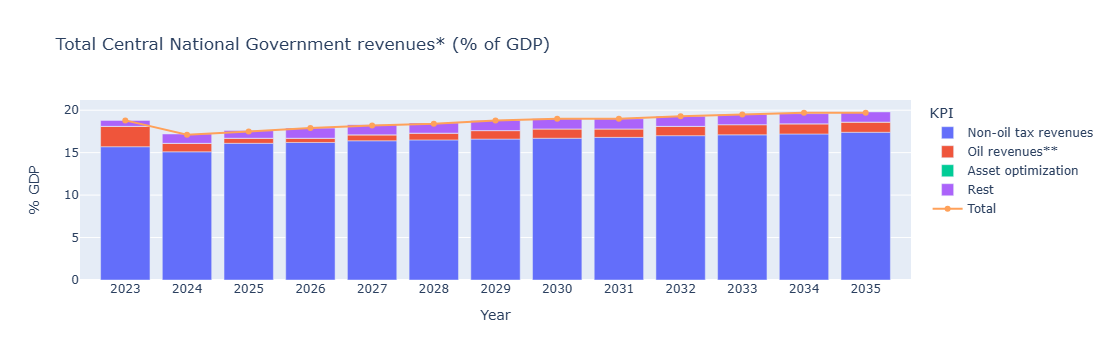

In [11]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

fig = px.bar(data_g36_graph[data_g36_graph.KPI != "Total"], x="Year", y="% GDP", color="KPI", title="Total Central National Government revenues* (% of GDP)")
fig.add_trace(go.Scatter(x=data_g36_graph[data_g36_graph.KPI == "Total"]['Year'], y=data_g36_graph[data_g36_graph.KPI == "Total"]['% GDP'], name="Total"))
fig.show()

fig.write_html('./G36.html')

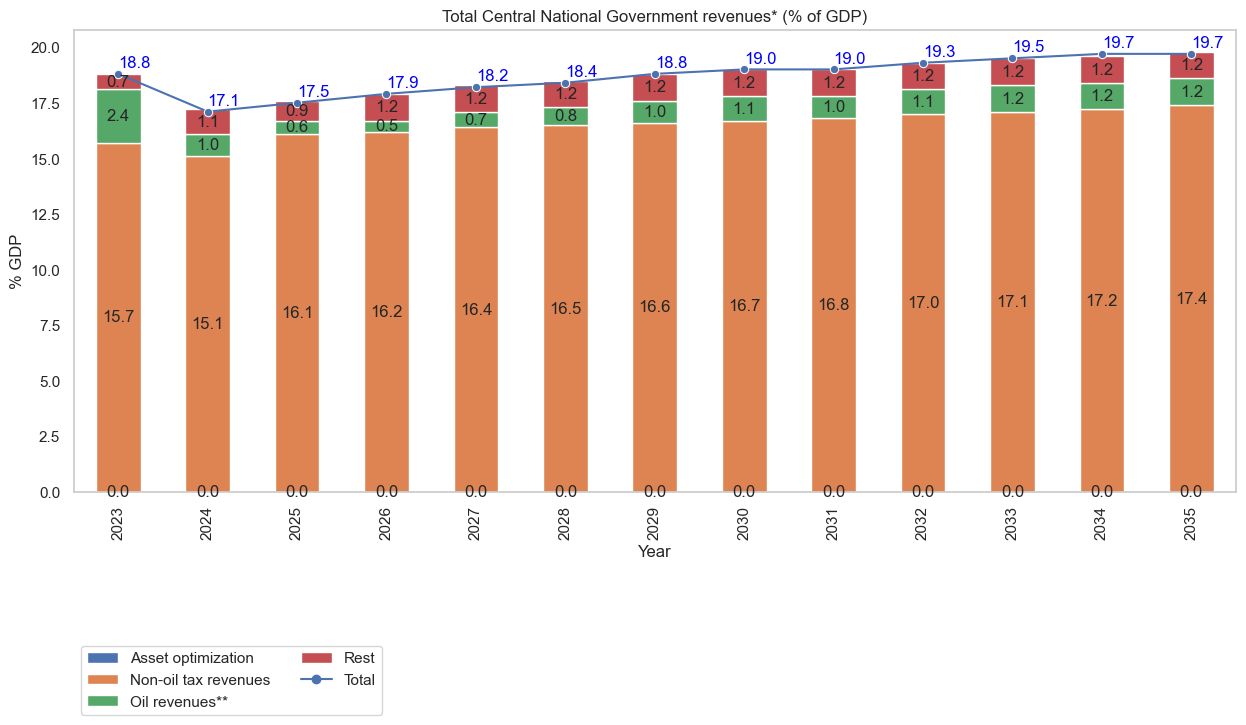

In [14]:
df = data_g36_graph[data_g36_graph.KPI != "Total"].pivot(index='Year', columns='KPI', values='% GDP')

fig, ax = plt.subplots(figsize = plotsize)

df.plot(kind='bar', stacked=True, ax=ax)

sns.lineplot(x="Year",  y="% GDP", data=data_g36_graph[data_g36_graph.KPI == "Total"], color="b", ax=ax, marker='o')
legend_line_plot = mlines.Line2D([], [], color="b", label="Total", marker='o')

df_linea = data_g36_graph[data_g36_graph.KPI == "Total"]
# label points on the plot
for x, y in zip(df_linea['Year'], df_linea['% GDP']):
     # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
     plt.text(x = x, # x-coordinate position of data label
     y = y+.3, # y-coordinate position of data label, adjusted to be 150 below the data point
     s = np.round(y, 1), # data label, formatted to ignore decimals
     color = 'blue') # set colour of line

handles, labels = ax.get_legend_handles_labels()
handles.extend([legend_line_plot])

ax.legend(handles=handles, loc='lower left', bbox_to_anchor=(0, -0.5), ncols = 2)
ax.grid(False)
plt.title("Total Central National Government revenues* (% of GDP)")

for c in ax.containers:

    # Optional: if the segment is small or 0, customize the labels
    labels = [np.round(v.get_height(), 1) for v in c]# [v.get_height() if v.get_height() > 0 else '' for v in c]
    
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels, label_type='center')